## OOP Polymorphism

In [1]:
# example with python built-in
print(f"{len([1,23,4])=}")
print(f"{len('1234')=}") 

len([1,23,4])=3
len('1234')=4


## Polymorphism in class method

In [8]:
class Fish():
    def __init__(self, name) -> None:
        self.name = name
    
    # overrided dunder string method.
    def __str__(self):
        return f"I am a Fish with name {self.name}"

    # overrided.
    def __repr__(self) -> str:
        return f"Fish('name: {self.name}')"

    def speak(self):
        print("Bluppy, Bluppy")

class Fox():

    def __init__(self, name) -> None:
        self.name = name

    def __str__(self) -> str:
        return f"I am a fox with name {self.name}, my sound is myserious"

    def speak(self):
        return NotImplemented


fish1 = Fish("Guppie")
print(fish1)
repr(fish1)
    

I am a Fish with name Guppie


"Fish('name: Guppie')"

In [9]:
fox1 = Fox("Ylvis")
animals = (fish1, fox1)

for animal in animals:
    print(animal)
    animal.speak()

I am a Fish with name Guppie
Bluppy, Bluppy
I am a fox with name Ylvis, my sound is myserious


## Operator overloading 

In [67]:
from __future__ import annotations
import numbers
import matplotlib.pyplot as plt

class Vector():
    """A Class to represent Euclidean vector with magnitude and diraction"""

    # *numbers -> arbitrary numbers of positional arguments. 
    def __init__(self, *numbers: float | int) -> None:
        for number in numbers:
            if not isinstance(number, (float, int)):
                raise TypeError(f"{number} is not a valid number")

        if len(numbers) <= 0:
            raise ValueError("Vectors cant be empty")
        
        self._numbers = tuple(float(number) for number in numbers)

    @property
    def numbers(self) -> tuple:
        """Returns numbers"""
        return self._numbers

    #operator overload + 
    def __add__(self, other: Vector) -> Vector:
        if self.validate_Vector(other):
            # (1,2) + (2,3) = (1+2, 2+3)
            numbers = (a+b for a,b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    def __sub__(self, other: Vector) -> Vector:
        if self.validate_Vector(other):
            numbers = (a-b for a,b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    def validate_Vector(self, other: Vector) -> Vector:
        """Validate if two vectors have same length"""
        if not isinstance(other, Vector) or len(other) != len(self):
            raise TypeError("Both must be Vector and have same lenght")
        return len(self) == len(other) #returns True or False

    # to use len on vector we have to overload it.
    def __len__(self) -> int:
        """Returns number of elements in a vector not the lenght of the vector"""
        return len(self.numbers)

    # [] operator - __getitem__()
    def __getitem__(self, item: int) -> float:
        return self.numbers[item]

    # overload abs() function
    def __abs__(self) -> float:
        """Returns Euclidean 2nd norm of a vector"""
        return sum(a**2 for a in self.numbers)**0.5

    def plot(self, *others: "Vector") -> None:
        """ Visualize 2D vectors"""
        X, Y = [], []

        for vector in tuple(others):
            if Vector.is2D(vector) and Vector.is2D(self):
                X.append(vector[0])
                Y.append(vector[1])
        
        X.append(self[0])
        Y.append(self[1])

        originX = originY = tuple(0 for _ in range(len(X)))

        plt.quiver(originX, originY, X, Y, scale=1,
                   scale_units="xy", angles="xy")
        plt.xlim(-2, 10)
        plt.ylim(-2, 10)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"{self}, {others}")
        plt.grid()
        plt.show()
    
    @staticmethod
    def is2D(vector: Vector) -> bool:
        return len(vector) == 2

    # Overload * Operator
    def __mul__(self, value: float) -> Vector:
        print("__mul__called")
        if not isinstance(value, (float, int)):
            raise TypeError(f"The value must be a int or a float!")
        numbers = (value*a for a in self.numbers)
        return Vector(*numbers)

    def __rmul__(self, value: float) -> Vector:
        print("__rmul__called")
        return self*value

    def __repr__(self) -> str:
        return f"Vector{self._numbers}"
        


#Vector("123", 3, 4)
v1 = Vector(1, 2, 3)
print(v1)

try:
    v2 = Vector()

except ValueError as err:
    print(err) 

v2 = Vector(-1, -2)
print(v2.numbers)


v3 = Vector(2,3)

Vector(1.0, 2.0, 3.0)
Vectors cant be empty
(-1.0, -2.0)


In [68]:
print(f"{v2=}, {v3=}")
print(v2.__add__(v3))
v3+v2
v3-Vector(3,2)

print(f"{v3[1]=}")


v2=Vector(-1.0, -2.0), v3=Vector(2.0, 3.0)
Vector(1.0, 1.0)
v3[1]=3.0


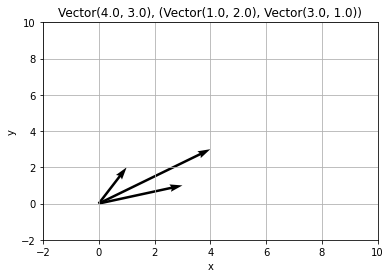

__mul__called
Vector(5.0, 15.0)
__rmul__called
__mul__called
Vector(5.0, 15.0)


In [69]:
v1 = Vector(1,2)
v2 = Vector(3,1)
v3 = v1+v2

v3.plot(v1, v2)

print(Vector(1,3)*5)
print(5*Vector(1,3))

In [50]:
l = [3, 2, 5, 12, 5, 6, 10]

l.sort()
print(l[1:-1])

[3, 5, 5, 6, 10]
